In [1]:
!pip install pandas
!pip install numpy
!pip install plotly
!pip install matplotlib

In [2]:
#importing packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go 
import matplotlib.pyplot as plt

In [3]:
#importing dataframes as csv
confirmed_cases_df = pd.read_csv('covid_confirmed_cases.csv')
confirmed_deaths_df = pd.read_csv('confirmed_deaths.csv')

# Data Manipulation and Cleaning

In [4]:
#dropping columns that I don't need
confirmed_cases_df = confirmed_cases_df.drop(columns=['Lat', 'Long', 'Province/State'])
confirmed_deaths_df = confirmed_deaths_df.drop(columns=['Lat', 'Long', 'Province/State'])
confirmed_deaths_df.head()

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  12/10/2021  12/11/2021  12/12/2021  \
0        0        0        0  ...        7322        7325        7328   
1        0        0        0  ...        3130        3132        3134   
2        0        0        0  ...        6132        6137        6145   
3        0        0        0  ...         133         133         133   
4        0        0        0  ...        1737        1737        1737   

   12/13/21  12/14/21  12/15/21  12/16/21  12/17/21  12/18/21  12/19/21  
0      7328      7329      7331      7332      7332      7333      7335  
1      3140      3144      3152      3156      3158      3161      3166  
2      6151      6155      6165      6171      6175      6180      6184  
3       133       134       134       134       134       134       134  
4      1737      1737      1737      1737      1738      1738      1738  

[5 rows x 699 columns]

In [5]:
#group data by Country
confirmed_cases_df = confirmed_cases_df.groupby(by='Country/Region').aggregate(np.sum).T
confirmed_cases_df.index.name = 'Date'
confirmed_cases_df = confirmed_cases_df.reset_index()
confirmed_deaths_df = confirmed_deaths_df.groupby(by='Country/Region').aggregate(np.sum).T
confirmed_deaths_df.index.name = 'Date'
confirmed_deaths_df = confirmed_deaths_df.reset_index()
confirmed_cases_df.head()

Country/Region     Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0               1/22/20            0        0        0        0       0   
1               1/23/20            0        0        0        0       0   
2               1/24/20            0        0        0        0       0   
3               1/25/20            0        0        0        0       0   
4               1/26/20            0        0        0        0       0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
0                                 0          0        0          0  ...   
1                                 0          0        0          0  ...   
2                                 0          0        0          0  ...   
3                                 0          0        0          0  ...   
4                                 0          0        0          4  ...   

Country/Region  United Kingdom  Uruguay  Uzbekistan  Vanuatu  Venezuela  \
0                            0        0           0        0          0   
1                            0        0           0        0          0   
2                            0        0           0        0          0   
3                            0        0           0        0          0   
4                            0        0           0        0          0   

Country/Region  Vietnam  West Bank and Gaza  Yemen  Zambia  Zimbabwe  
0                     0                   0      0       0         0  
1                     2                   0      0       0         0  
2                     2                   0      0       0         0  
3                     2                   0      0       0         0  
4                     2                   0      0       0         0  

[5 rows x 197 columns]

In [6]:
#melting the data
confirmed_cases_melt_df = confirmed_cases_df.melt(id_vars='Date').copy()
confirmed_cases_melt_df.rename(columns={'value':'Confirmed'}, inplace=True)
confirmed_deaths_melt_df = confirmed_deaths_df.melt(id_vars='Date').copy()
confirmed_deaths_melt_df.rename(columns={'value':'Confirmed'}, inplace=True)
confirmed_cases_melt_df.head()

Date Country/Region  Confirmed
0  1/22/20    Afghanistan          0
1  1/23/20    Afghanistan          0
2  1/24/20    Afghanistan          0
3  1/25/20    Afghanistan          0
4  1/26/20    Afghanistan          0

In [7]:
#formatting the date 
confirmed_cases_melt_df['Date'] = pd.to_datetime(confirmed_cases_melt_df['Date'])
confirmed_cases_melt_df['Date'] = confirmed_cases_melt_df['Date'].dt.strftime('%d/%m/%Y')
confirmed_deaths_melt_df['Date'] = pd.to_datetime(confirmed_deaths_melt_df['Date'])
confirmed_deaths_melt_df['Date'] = confirmed_deaths_melt_df['Date'].dt.strftime('%d/%m/%Y')

In [8]:
max_date = confirmed_cases_melt_df['Date'].max()
max_date

'31/12/2020'

In [9]:
total_confirmed_df = confirmed_cases_melt_df[confirmed_cases_melt_df['Date'] == max_date]
total_confirmed = total_confirmed_df['Confirmed'].sum()
total_confirmed

83730242

In [10]:
total_death_df = confirmed_deaths_melt_df[confirmed_deaths_melt_df['Date'] == max_date]
total_death = total_death_df['Confirmed'].sum()
total_death

1880668

In [11]:
total_active = total_confirmed - total_death
total_active

81849574

# Data Visualization

In [12]:
#create a new df
total_confirmed_df = confirmed_cases_melt_df[confirmed_cases_melt_df['Date'] == max_date]
total_confirmed_df

Date      Country/Region  Confirmed
344     31/12/2020         Afghanistan      52330
1042    31/12/2020             Albania      58316
1740    31/12/2020             Algeria      99610
2438    31/12/2020             Andorra       8049
3136    31/12/2020              Angola      17553
...            ...                 ...        ...
133662  31/12/2020             Vietnam       1465
134360  31/12/2020  West Bank and Gaza     138004
135058  31/12/2020               Yemen       2099
135756  31/12/2020              Zambia      20725
136454  31/12/2020            Zimbabwe      13867

[196 rows x 3 columns]

In [13]:
total_confirmed = total_confirmed_df['Confirmed'].sum()
total_confirmed

83730242

# 5 Visualizations


In [27]:
fig = px.bar(total_confirmed_df.sort_values('Confirmed', ascending=False).head(30)
             , x='Country/Region', y='Confirmed', text='Confirmed', title='Total COVID 19 cases, all countries')
fig.show()

In [35]:
fig2 = px.scatter(confirmed_deaths_melt_df, x='Date', y='Confirmed', color='Country/Region', 
                  title='Increase in COVID 19 deaths by date, all countries')
fig2.show()

In [32]:
fig3 = px.line(confirmed_cases_melt_df[confirmed_cases_melt_df['Country/Region'] == 'Ireland'], 
               x='Date', y='Confirmed', title='Increase in COVID 19 cases by date, individual country')
fig3.show()

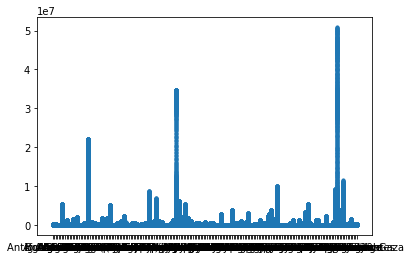

In [40]:
#same data visualized using matplotlib, comparing with fig3, plotly is a much better option 
plt.scatter(x='Country/Region', y='Confirmed', data=confirmed_cases_melt_df, s=10)
plt.show()

In [34]:
fig4 = px.choropleth(total_confirmed_df, 
                     locations='Country/Region', locationmode='country names',
                     color_continuous_scale='Rainbow',
                     color=total_confirmed_df['Confirmed'], height=500, title='World map of all COVID 19 cases')                                                                     
fig4.show()

In [38]:
fig5 = px.scatter(total_confirmed_df, x='Confirmed', y='Confirmed', color=total_confirmed_df['Country/Region'],
                  size='Confirmed', log_x=True, height=500, title='Total COVID 19 cases, all countries')
fig5.show()